# VAEs Study 01: 2020/01/01

> see Tutorial on Variational Autoencoders, by CARL DOERSCH, at https://arxiv.org/pdf/1606.05908.pdf


> Page 5: 

> VAEs take an unusual approach to dealing with this problem: they assume that there is no simple interpretation of the dimensions of $z$, and instead assert that samples of $z$ can be drawn from a simple distribution, i.e., $\mathcal{N} ( 0, I )$, where $I$ is the identity matrix. 

> How is this possible? The key is to notice that any distribution in $d$ dimensions can be generated by taking a set of $d$ variables that are normally distributed and
mapping them through a `sufficiently complicated function`. For example, say we wanted to construct a 2D random variable whose values lie on a ring. If $z$ is 2D and normally distributed, $g (z) = z/10 + z/ || z || $ is roughly ring-shaped, as shown in Figure 2. Hence, provided powerful function approximators, we can simply learn a function which maps our independent, normally-distributed $z$ values to whatever latent variables might be needed for the model, and then map those latent variables to $X$. In fact, recall that $P ( X | z; \theta ) = N ( X | f ( z; \theta ) , \sigma^ 2 * I )$. If $f(z;\theta)$ is a multi-layer neural network, then we can imagine the network using its first few layers to map the normally distributed z’s to the latent values (like digit identity, stroke weight, angle, etc.) with exactly the right statitics. Then it can use later layers to map
those latent values to a fully-rendered digit. In general, we don’t need to worry about ensuring that the latent structure exists. If such latent structure helps the model accurately reproduce (i.e. maximize the likelihood of) the training set, then the network will learn that structure at some layer.

<img src="../files/vaes-s1-fig1.png" alt="drawing" width="700"/>

The validation of function $g(z)$ is shown below:

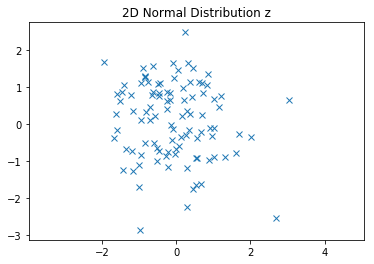

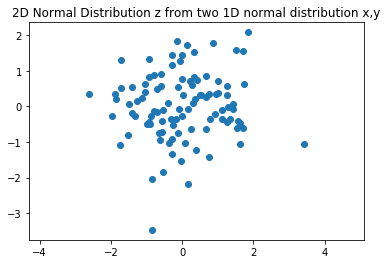

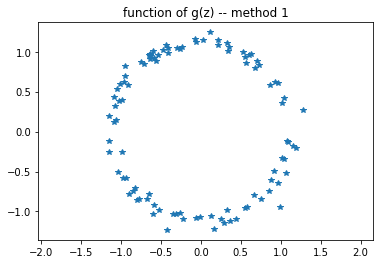

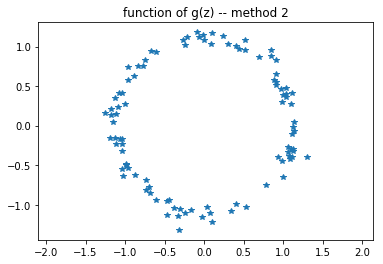

In [21]:
%matplotlib inline
#-------------
# method1
#-------------
import matplotlib.pyplot as plt
import numpy as np
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
N = 10
x, y = np.random.multivariate_normal(mean, cov, N**2).T # in size (2, 100)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.title('2D Normal Distribution z')
plt.show()

#-------------
# method2
#-------------
from scipy.stats import truncnorm
import pylab
def get_truncated_normal(mean=0, sd=1, low=-4, upp=4):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

dist1d = get_truncated_normal(mean=0, sd=1, low=-4, upp=4)
x1, y1 = dist1d.rvs(N**2), dist1d.rvs(N**2)
#print (x1.shape)
#print (y1.shape)
plt.plot(x1, y1, 'o')
pylab.ylim([-4,4])
pylab.xlim([-4,4])
plt.title('2D Normal Distribution z from two 1D normal distribution x,y')
plt.axis('equal')
plt.show()


#--------------------------------
# function g(z) = z /10 + z/||z||
#--------------------------------
z_norm = np.power(x**2 + y**2, 0.5)
x_g = x/10 + x/z_norm
y_g = y/10 + y/z_norm
plt.plot(x_g, y_g, '*')
pylab.ylim([-4,4])
pylab.xlim([-4,4])
plt.title('function of g(z) -- method 1')
plt.axis('equal')
plt.show()

#--------------------------------
# function g(z) = z /10 + z/||z||
#--------------------------------
z_norm = np.power(x1**2 + y1**2, 0.5)
x1_g = x1/10 + x1/z_norm
y1_g = y1/10 + y1/z_norm
plt.plot(x1_g, y1_g, '*')
pylab.ylim([-4,4])
pylab.xlim([-4,4])
plt.title('function of g(z) -- method 2')
plt.axis('equal')
plt.show()